In [2]:
import madmom
import aubio
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import mir_eval
import time

In [3]:
uploaded_file_name = "Referencni_skladby/The Beatles - Abbey Road (1969) (2012 180g Vinyl 24bit-96kHz) [FLAC] vtwin88cube/04.-Oh! Darling.wav"

### Librosa

In [4]:
y, sr =librosa.load(uploaded_file_name)

In [5]:
S = np.abs(librosa.stft(y))

In [6]:
chroma_librosa_stft = librosa.feature.chroma_stft(y=y, sr=sr)
chroma_librosa_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)
chroma_librosa_cens = librosa.feature.chroma_cens(y=y, sr=sr)
chroma_librosa_stft.shape

(12, 8825)

### Madmom

In [7]:
dcp = madmom.audio.DeepChromaProcessor()
chroma_madmom_deep = dcp(uploaded_file_name)
chroma_madmom_deep = np.transpose(chroma_madmom_deep)
chroma_madmom_deep.shape

(12, 2050)

### Aubio

Aubio neposkytuje přímý výpočet chromavektorů

### Zobrazení grafů

Potřeba upravit velikost okna u výpočtů Madmom

Text(0.5, 1.0, 'Madmom chroma Deep')

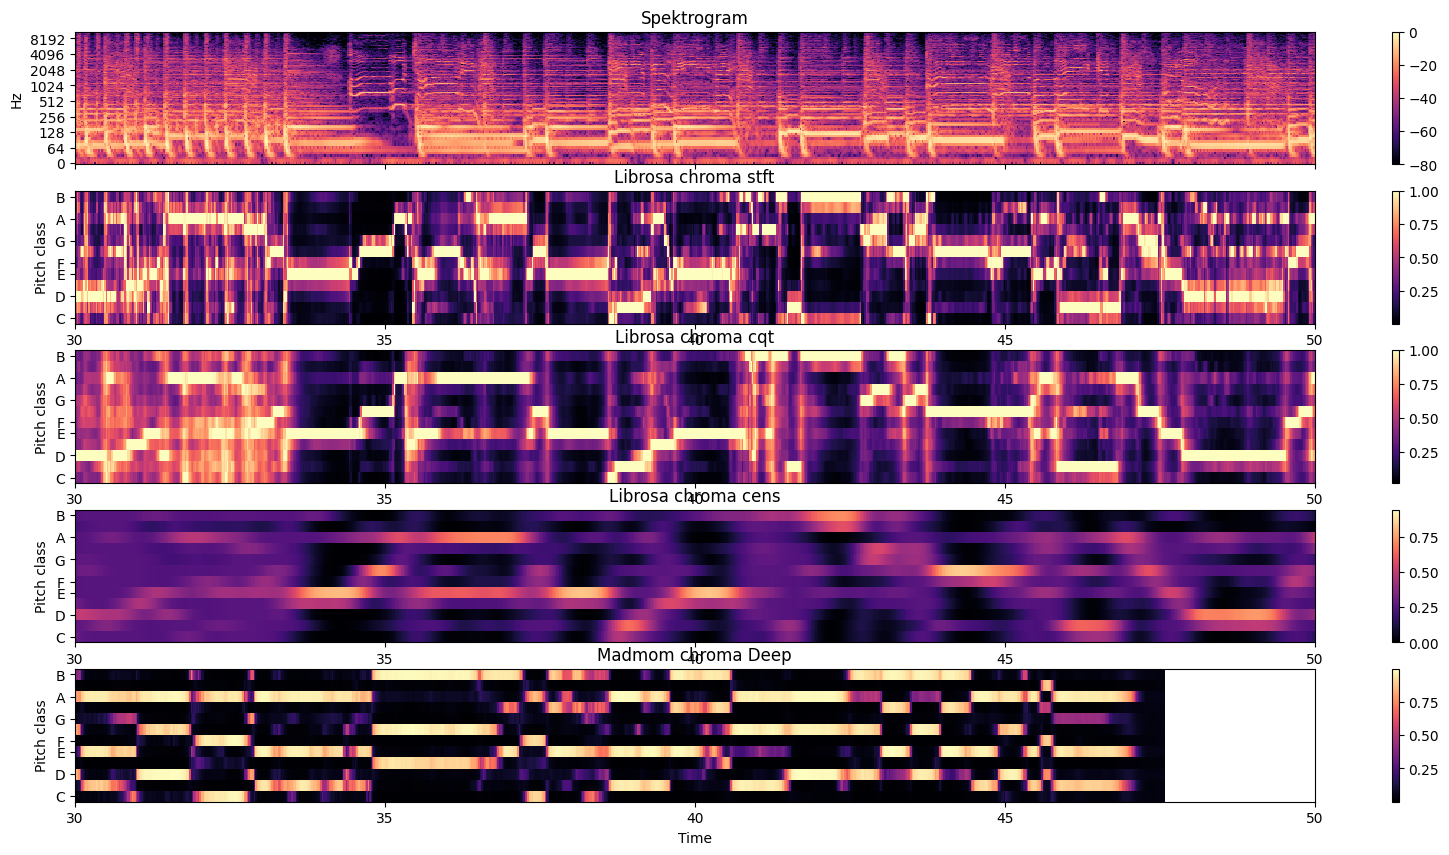

In [8]:
xmin_time = 30; # Čas skladby, oa kterého se vykreslí grafy.
xmax_time = 50; # Čas skladby, do kterého se vykreslí grafy.
fig, ax = plt.subplots(5,1, figsize=(20,10))

# //TODO: vyřešit časy os dle mě nejsou správně

img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].label_outer()
ax[0].set_xlim(xmin=xmin_time, xmax=xmax_time)
ax[0].set_title("Spektrogram")

img = librosa.display.specshow(chroma_librosa_stft, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set_xlim(xmin=xmin_time, xmax=xmax_time)
ax[1].set_title("Librosa chroma stft")

img = librosa.display.specshow(chroma_librosa_cqt, y_axis='chroma', x_axis='time', ax=ax[2])
fig.colorbar(img, ax=[ax[2]])
ax[2].set_xlim(xmin=xmin_time, xmax=xmax_time)
ax[2].set_title("Librosa chroma cqt")

img = librosa.display.specshow(chroma_librosa_cens, y_axis='chroma', x_axis='time', ax=ax[3])
fig.colorbar(img, ax=[ax[3]])
ax[3].set_xlim(xmin=xmin_time, xmax=xmax_time)
ax[3].set_title("Librosa chroma cens")

img = librosa.display.specshow(chroma_madmom_deep, y_axis='chroma', x_axis='time', ax=ax[4])
fig.colorbar(img, ax=[ax[4]])
ax[4].set_xlim(xmin=xmin_time, xmax=xmax_time)
ax[4].set_title("Madmom chroma Deep")